# Loading Libraries

In [25]:
import os
import conda
os.environ['PROJ_LIB'] =r'C:\Users\91876\anaconda3\Lib\site-packages\mpl_toolkits\basemap'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import squarify
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from __future__ import division
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import missingno as msno
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm
import cufflinks as cf
cf.go_offline()
# Input data files are available in the "../91876/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../91876"))

['.android', '.bash_history', '.BigNox', '.conda', '.condarc', '.config', '.continuum', '.cufflinks', '.eclipse', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.nbi', '.p2', '.PyCharmCE2019.3', '.ssh', '.tooling', '.VirtualBox', '2019pgcaca26_1.ipynb', '2019pgcaca26_2.ipynb', '28. Notes - Logistic Regression.zip', '3D Objects', 'aaa.pdf.pptx', 'abhi.ipynb', 'abhi_hacker.ipynb', 'accuracy_score.ipynb', 'anaconda3', 'anjali', 'AppData', 'Application Data', 'BullseyeCoverageError.txt', 'Contacts', 'Cookies', 'curr_dir.ipynb', 'd4ac4633ebd6440fa397b84f1bc94a3c.7z', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'even_odd.ipynb', 'Favorites', 'Git-2.33.0.2-64-bit.exe', 'IBA_IOAPDATA', 'IdeaProjects', 'inittk.ini', 'inst.ini', 'IntelGraphicsProfiles', 'know current directory.ipynb', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'ML examples.ipynb', 'Music', 'My Documents', 'netbeans-8.2-windows_2.exe', 'NetHood', 'Nox_share', 'NTUSER.D

In [26]:
schema = pd.read_csv("../91876/survey_results_schema.csv")
public = pd.read_csv("../91876/survey_results_public.csv")


C:\Users\91876\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.



In [27]:
pd.options.display.max_colwidth = 300
schema[:10]

Column  \
0       Respondent   
1            Hobby   
2       OpenSource   
3          Country   
4          Student   
5       Employment   
6  FormalEducation   
7   UndergradMajor   
8      CompanySize   
9          DevType   

                                                                                                                                      QuestionText  
0                                                                           Randomized respondent ID number (not in order of survey response time)  
1                                                                                                                          Do you code as a hobby?  
2                                                                                                       Do you contribute to open source projects?  
3                                                                                                        In which country do you currently reside?  
4                                                           Are you currently enrolled in a formal, degree-granting college or university program?  
5                                                                            Which of the following best describes your current employment status?  
6                                               Which of the following best describes the highest level of formal education that you’ve completed?  
7  You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')  
8                                                          Approximately how many people are employed by the company or organization you work for?  
9                                                                               Which of the following describe you? Please select all that apply.

In [28]:
public.head()

Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                         FormalEducation  \
0  Employed part-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                        Associate degree   
3  Employed full-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning a degree   

                                                    UndergradMajor  \
0                                        Mathematics or statistics   
1              A natural science (ex. biology, chemistry, physics)   
2  Computer science, computer engineering, or software engineering   
3  Computer science, computer engineering, or software engineering   
4  Computer science, computer engineering, or software engineering   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   
3      100 to 499 employees   
4  10,000 or more employees   

                                                                                                                         DevType  \
0                                                                                                           Full-stack developer   
1                                             Database administrator;DevOps specialist;Full-stack developer;System administrator   
2                                                                                       Engineering manager;Full-stack developer   
3                                                                                                           Full-stack developer   
4  Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student   

   ...                    Exercise Gender         SexualOrientation  \
0  ...        3 - 4 times per week   Male  Straight or heterosexual   
1  ...   Daily or almost every day   Male  Straight or heterosexual   
2  ...                         NaN    NaN                       NaN   
3  ...  I don't typically exercise   Male  Straight or heterosexual   
4  ...        3 - 4 times per week   Male  Straight or heterosexual   

                                         EducationParents  \
0                Bachelor’s degree (BA, BS, B.Eng., etc.)   
1                Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                                                     NaN   
3  Some college/university study without earning a degree   
4  Some college/university study without earning a degree   

                  RaceEthnicity                Age Dependents  MilitaryUS  \
0   Black or of African descent  25 - 34 years old        Yes         NaN   
1  White or of European descent  35 - 44 years old        Yes         NaN   
2                           NaN                NaN        NaN         NaN   
3  White or of European descent  35 - 44 years old         No          No   
4  White or of European descent  18 - 24 years old        Yes         NaN   

                          SurveyTooLong     SurveyEasy  
0  The survey was an appropriate length      Very easy  
1  The survey was an appropriate length  Somewhat easy  
2                                   NaN            NaN  
3  The survey was an appropriate length  Somewhat easy  
4  The survey was an appropriate length  Somewhat easy  

[5 rows x 129 columns]

In [29]:
public.shape

(98855, 129)

### MISSING values

In [30]:
null_values = public.isnull().sum().sort_values(ascending = False)
percentage = (public.isnull().sum().sort_values(ascending = False) / public.shape[0])*100

missing  = pd.concat([null_values, percentage], axis =1, keys = ['null_values', 'percentage'])
missing.head(10)

null_values  percentage
TimeAfterBootcamp                 92203   93.270952
MilitaryUS                        83074   84.036215
HackathonReasons                  73164   74.011431
ErgonomicDevices                  64797   65.547519
AdBlockerReasons                  61110   61.817814
StackOverflowJobsRecommend        60538   61.239189
JobEmailPriorities1               52642   53.251732
JobEmailPriorities2               52642   53.251732
JobEmailPriorities3               52642   53.251732
JobEmailPriorities4               52642   53.251732

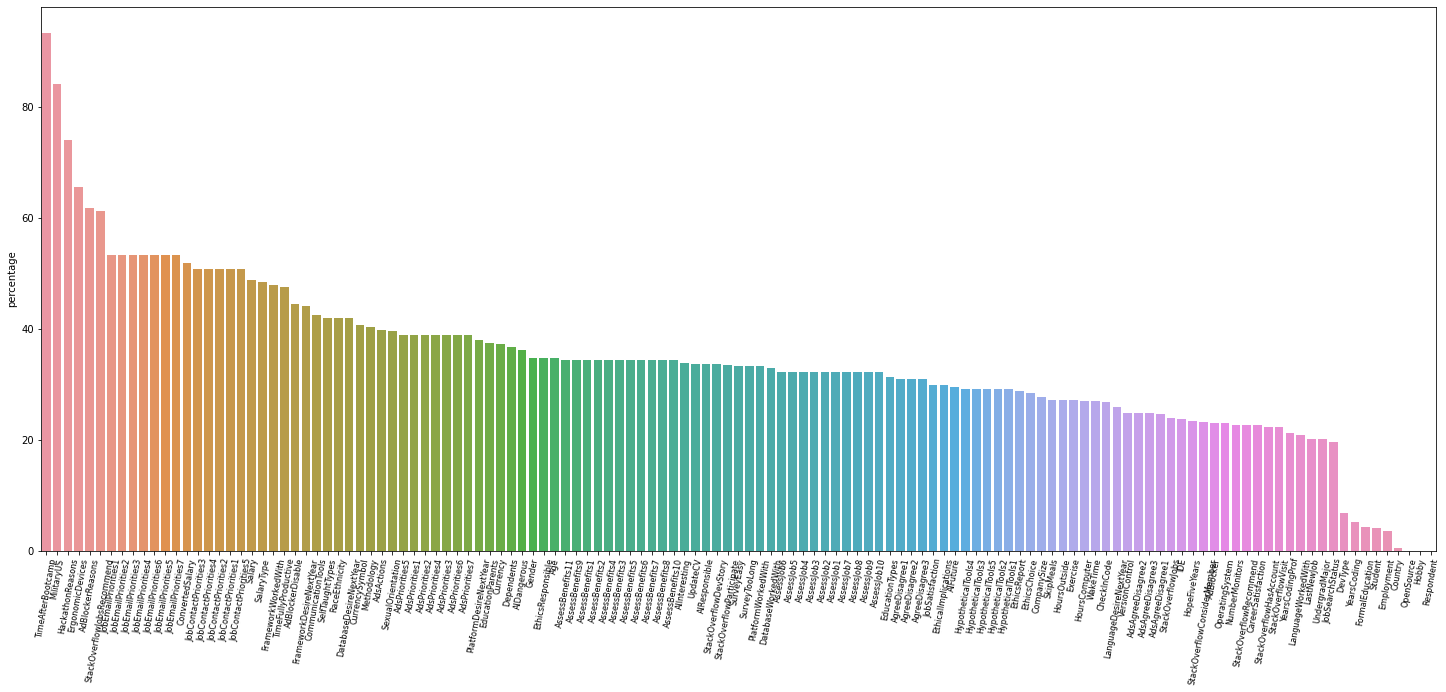

In [31]:
fig = plt.figure(figsize = (25, 10))
ax = sns.barplot(missing.index, missing['percentage'])
plt.xticks(rotation = 80, fontsize = 8)
plt.show()

# Analysing country

In [32]:
tree = public['Country'].value_counts().to_frame()

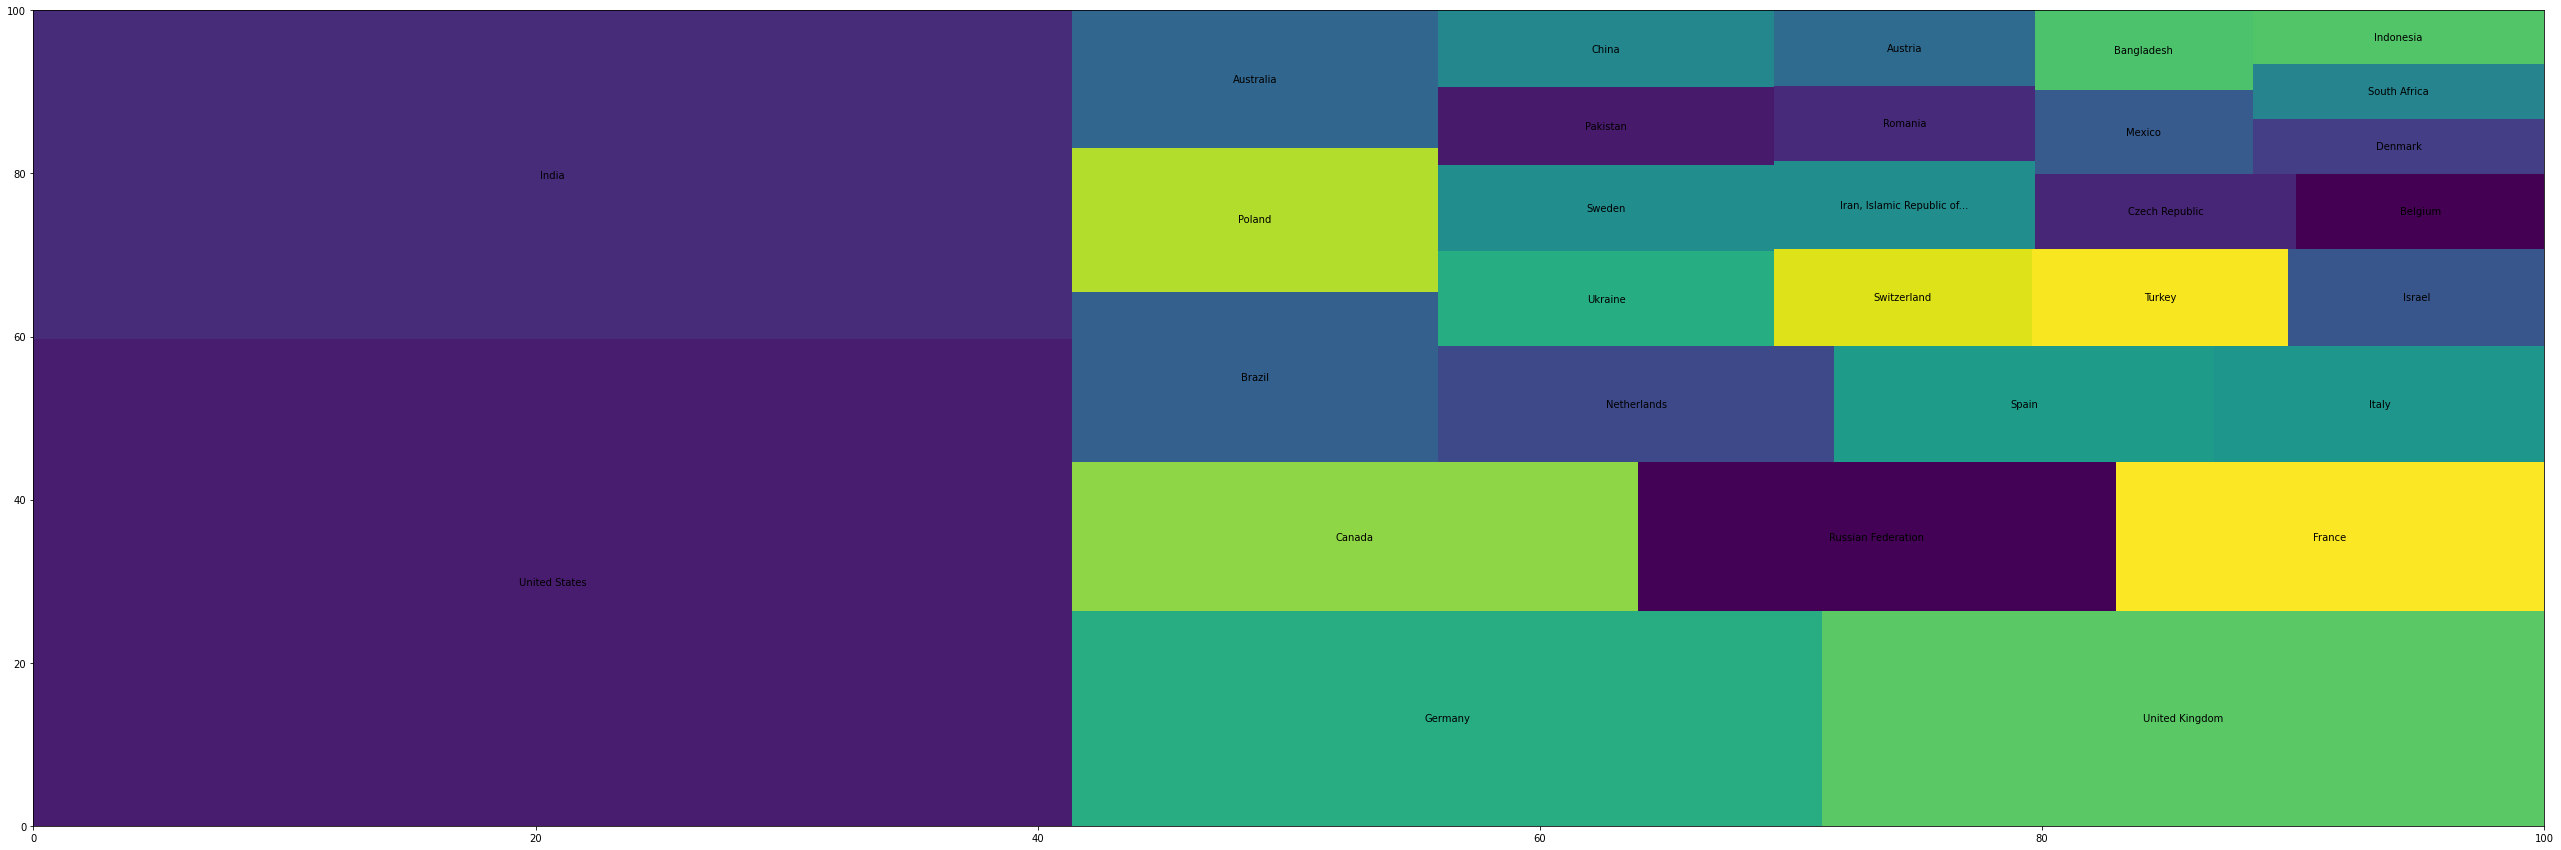

In [33]:
squarify.plot(sizes = tree['Country'].values[:30], label = tree.index[:30])
plt.rcParams.update({'font.size': 6})
fig = plt.gcf()
fig.set_size_inches(45, 15)
# plt.savefig('bjdsfb.png')
plt.show()

# gender

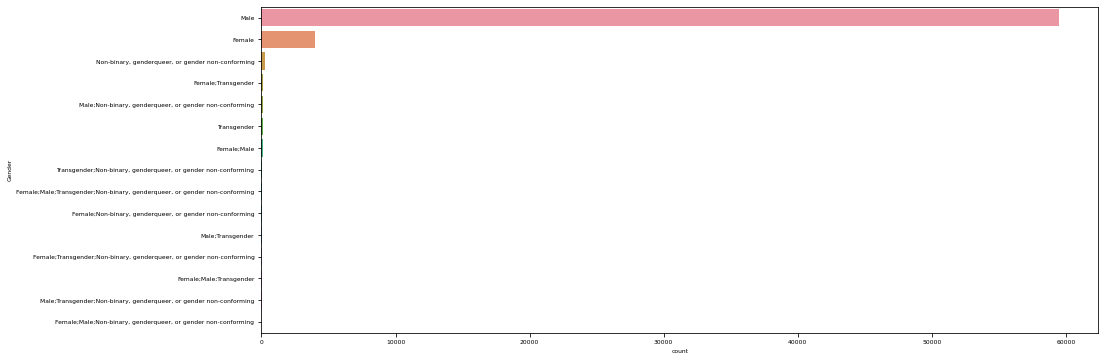

In [34]:
fig = plt.figure(figsize = (15,6))
sns.countplot(y = public['Gender'], order = public['Gender'].value_counts().index)
plt.show()

# JOB

In [35]:
job = []

dev = public['DevType'].dropna()

for i in dev.index:
    job.extend([x for x in dev[i].split(';')])


In [36]:
job

['Full-stack developer',
 'Database administrator',
 'DevOps specialist',
 'Full-stack developer',
 'System administrator',
 'Engineering manager',
 'Full-stack developer',
 'Full-stack developer',
 'Data or business analyst',
 'Desktop or enterprise applications developer',
 'Game or graphics developer',
 'QA or test developer',
 'Student',
 'Back-end developer',
 'Database administrator',
 'Front-end developer',
 'Full-stack developer',
 'Back-end developer',
 'Front-end developer',
 'Full-stack developer',
 'Designer',
 'Front-end developer',
 'QA or test developer',
 'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Database administrator',
 'DevOps specialist',
 'Engineering manager',
 'Full-stack developer',
 'System administrator',
 'Designer',
 'Back-end developer',
 'Database administrator',
 'Mobile developer',
 'System administrator',
 'Back-end developer',
 'Front-end developer',
 'Full-stack developer',
 'Back-end developer',
 'Fro

In [38]:
from collections import Counter

In [39]:
a = dict(Counter(job))

In [40]:
job_data = pd.DataFrame(list(a.items()), columns = ['Job', 'Count'])
job_data.sort_values(by = ['Count'], ascending =False, inplace = True)


In [41]:
job_data

Job  Count
10                             Back-end developer  53300
0                            Full-stack developer  44353
11                            Front-end developer  34822
14                               Mobile developer  18804
6    Desktop or enterprise applications developer  15807
9                                         Student  15732
1                          Database administrator  13216
12                                       Designer  12019
3                            System administrator  10375
2                               DevOps specialist   9549
5                        Data or business analyst   7559
15  Data scientist or machine learning specialist   7088
8                            QA or test developer   6194
4                             Engineering manager   5256
18     Embedded applications or devices developer   4819
7                      Game or graphics developer   4642
17                                Product manager   4316
19                Educator or academic researcher   3641
13             C-suite executive (CEO, CTO, etc.)   3491
16                Marketing or sales professional   1122

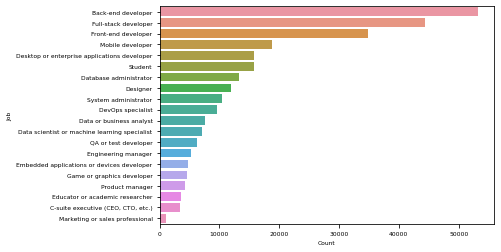

In [42]:
fig = plt.figure()
sns.barplot(y=job_data['Job'], x = job_data['Count'])
f = plt.gcf()
# f.set_size_inches((20, 15))
plt.show()

# Hobby

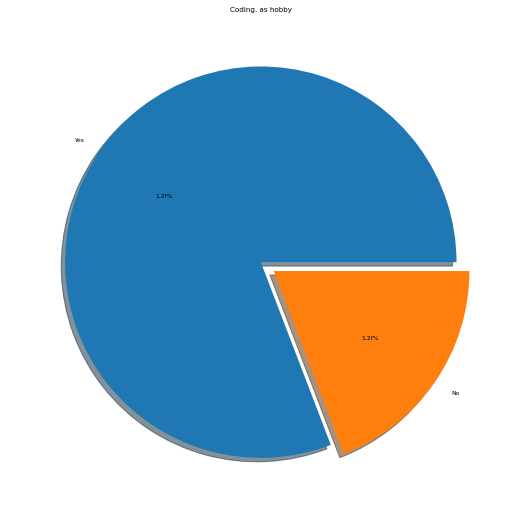

In [43]:
fig,ax = plt.subplots(1, 1, figsize= (9,9))
ax = public['Hobby'].value_counts().plot.pie(autopct = '1.2f%%', shadow = True, 
                                            explode = [0, 0.08])
ax.set_ylabel(' ')
plt.title("Coding. as hobby")
plt.show()

# WordCloud

In [44]:
country = public['Country'].value_counts().reset_index()

In [45]:
country

index  Country
0     United States    20309
1             India    13721
2           Germany     6459
3    United Kingdom     6221
4            Canada     3393
..              ...      ...
178     Saint Lucia        1
179         Grenada        1
180         Eritrea        1
181         Burundi        1
182    Sierra Leone        1

[183 rows x 2 columns]

In [46]:
from wordcloud import WordCloud

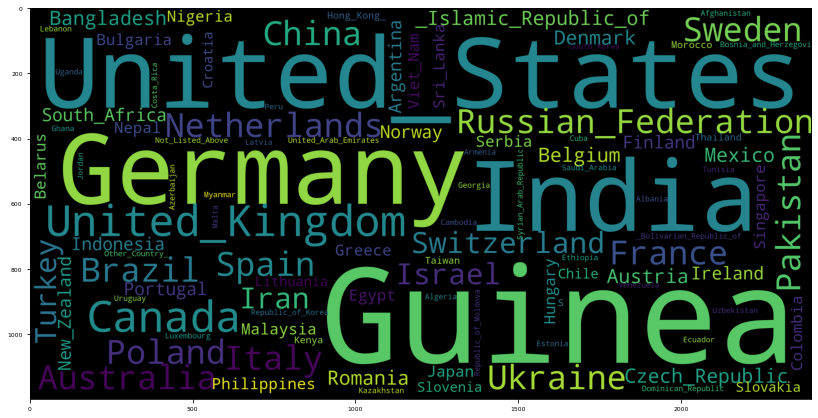

In [47]:
country_ = country['index'].str.replace(" ", "_")
cloud = WordCloud(scale = 6).generate(" ".join(country_))
plt.figure(figsize =(14,10))
plt.imshow(cloud)
plt.show()

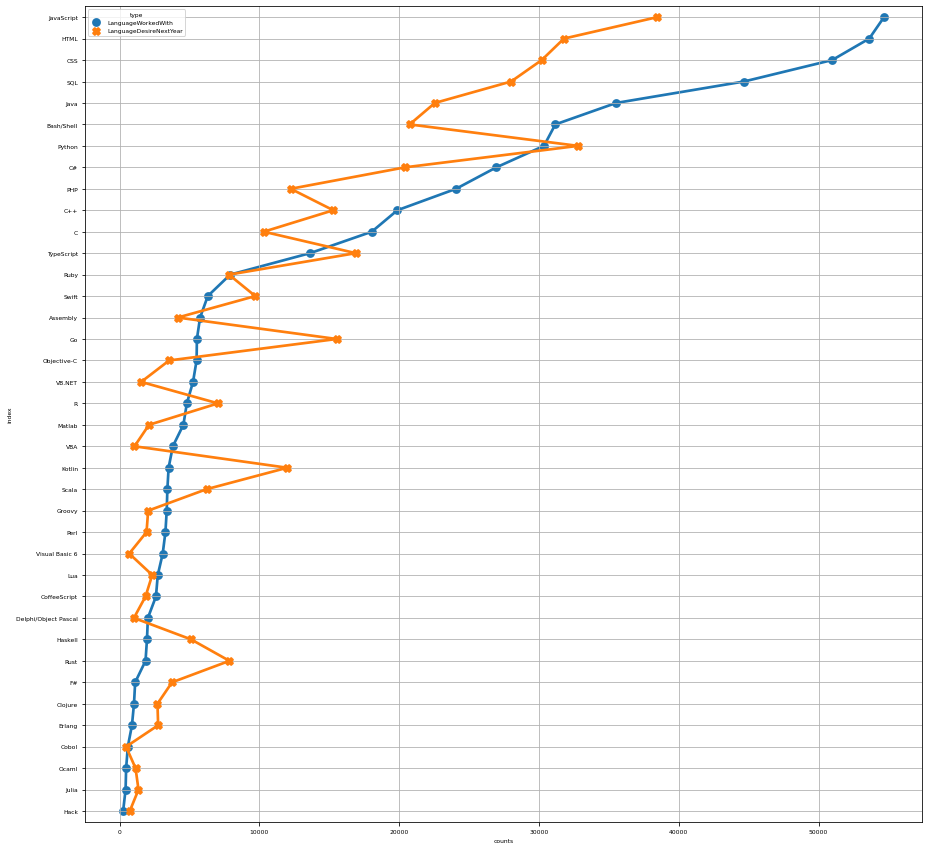

In [48]:
data1 = public['LanguageWorkedWith'].str.split(';', expand = True).stack().reset_index()[0].value_counts().reset_index()
data1['type'] = 'LanguageWorkedWith'
data2 = public['LanguageDesireNextYear'].str.split(';', expand = True).stack().reset_index()[0].value_counts().reset_index()
data2['type'] = 'LanguageDesireNextYear'

data = pd.concat([data1, data2], axis = 0)
data.rename(columns = {0:'counts'}, inplace = True)

sns.pointplot(x = "counts", y  = "index", data = data, hue = 'type', join  = True, markers = ["o", "X"])
plt.grid(True, alpha =1)
g = plt.gcf()
g.set_size_inches(15, 15)